# A survey of Classifiers

We would generate 2-dim binary labeled data sets, not linearly seperated, and try to classify them using
some classifiers like:
- Decision Tree
- Random Forest
- Support vector Machines
- AdaBoost
- XGBOOST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

## Generate the data
We generate 2-dim data on a grid $[-\alpha, \alpha]^2$, with $\alpha = 1.5$ classified as followed:
- seperated in the diagonal with a sin-like function like $x_2 = 0.2\sin(10x_1)+x_1$, with points above the line labeled $+1$ and below $-1$.
- to complecate the data we define two circles $C_1\left( (-\frac{\alpha}{3},\frac{\alpha}{3}), \,\rho \right)$ and $C_2\left( (\frac{\alpha}{3},-\frac{\alpha}{3}), \, \rho \right)$, above and below the diagonal, and points inside those circles have opposite labels to the surronted points, i.e. points on circle 1 have labels $-1$ and points on $C_2$ have labels $+1$

In [2]:
# Generate the data set

# This defines the wiggly line separating diagonal that we see in the plot below
def diagonal_function(x):
    return 0.2*np.sin(10*x) + x

def diagonal_seperator(x, y):
    if y >= diagonal_function(x):
        label = 1
    else:
        label = -1
    return label

# This defines the cloud in the lower right corner of the plot below
def circle1(x, y, a, r):
    if (x+a/3)**2 + (y-a/3)**2 <= r**2:
        # return -2 to flip +1 >> -1
        rv = -2
    else:
        rv = 0
        
    return rv

# This defines the cloud in the upper left corner of the plot below
def circle2(x, y, a, r):
    if (x-a/3)**2 + (y+a/3)**2 <= r**2:
        # return +2 to flip -1 >> +1
        rv = 2
    else:
        rv = 0
        
    return rv

def generate_data(n, a, r):
    # generate n data 2-dim random in the interval -a, a 
    x = 2*(np.random.rand(n, 2) - [0.5, 0.5])*a
    labels = [diagonal_seperator(x[i,0],x[i,1]) + circle1(x[i,0], x[i,1], a, r) + circle2(x[i,0], x[i,1], a, r) for i in range(n) ]
    
    return x, np.array(labels)

In [3]:
# define parameters and generate the data
n, a, r = 1000, 1.5, np.sqrt(0.1) 
x, y = generate_data(n, a, r)

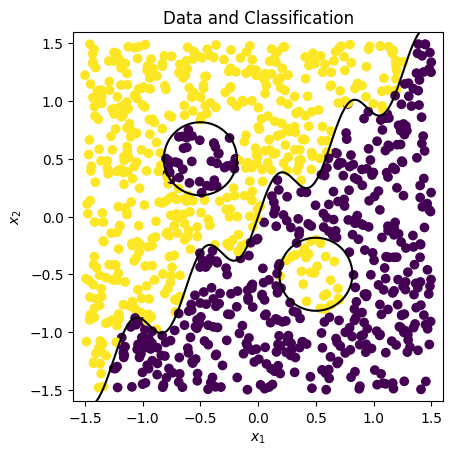

In [4]:
def plot_circle(ax, x0, y0, r):
    phi_values = np.arange(0, 2*np.pi, 0.01)
    x_values = x0 + r*np.cos(phi_values)
    y_values = y0 + r*np.sin(phi_values)
    ax.plot(x_values, y_values, c = 'black')

def plot_diagonal(ax, a):
    x_values = np.arange(-a, a, 0.01)
    y_values = diagonal_function(x_values)
    ax.plot(x_values, y_values, c = 'black')

def plot_data(ax, x, y):
    ax.scatter(x[:, 0], x[:, 1], c = y)

def plot_data_bndrs(x, y, a, r, title = 'Data and Classification'):

    fig, ax = plt.subplots()
    plot_circle(ax, -a/3, a/3, r)
    plot_circle(ax, a/3, -a/3, r)
    plot_diagonal(ax, a)
    plot_data(ax, x, y)
    ax.set_aspect('equal')
    ax.set(xlim=(-a-0.1, a+0.1), ylim=(-a-0.1, a+0.1))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.show()
    
plot_data_bndrs(x, y, a, r)

In [5]:
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

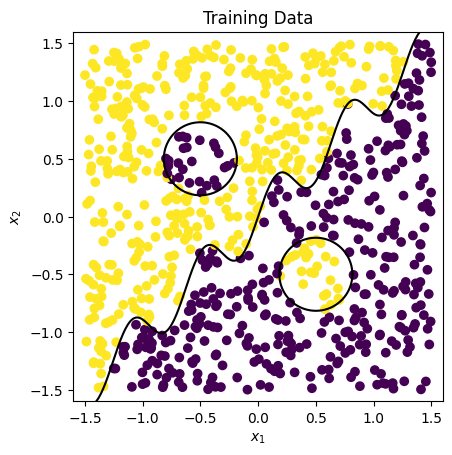

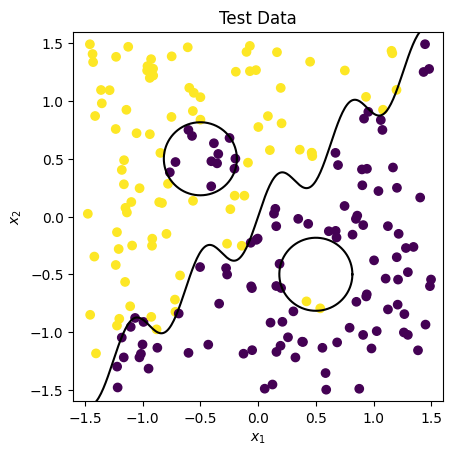

In [6]:
plot_data_bndrs(x_train, y_train, a, r, title='Training Data')
plot_data_bndrs(x_test, y_test, a, r, title='Test Data')

# Use Random Decision Tree

In [7]:
depths = np.arange(1, 21, 1)
precisions_gini = []
precisions_entropy = []

for d in depths:
    decision_tree_model_gini = DecisionTreeClassifier(criterion='gini', max_depth=d)
    decision_tree_model_gini.fit(x, y)
    precisions_gini.append(decision_tree_model_gini.score(x, y))
    decision_tree_model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    decision_tree_model_entropy.fit(x, y)
    precisions_entropy.append(decision_tree_model_entropy.score(x, y))

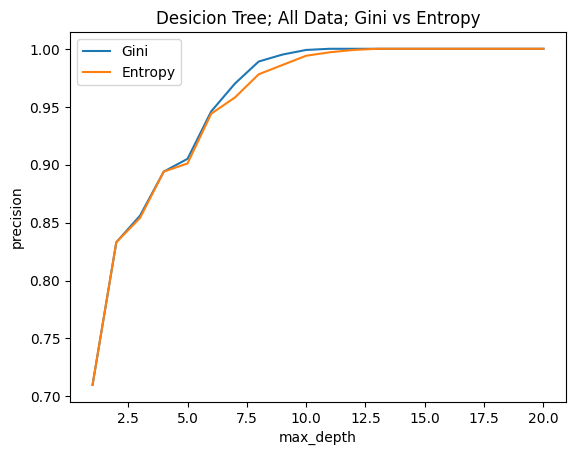

In [8]:
plt.plot(depths, precisions_gini, label = 'Gini')
plt.plot(depths, precisions_entropy, label = 'Entropy')
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.title('Desicion Tree; All Data; Gini vs Entropy')
plt.legend()
plt.show()

We see that with max depth of the tree around 10 we classify correctly all data.  
Notice that using Gini as a spliting Critirion function is a bit better than entropy

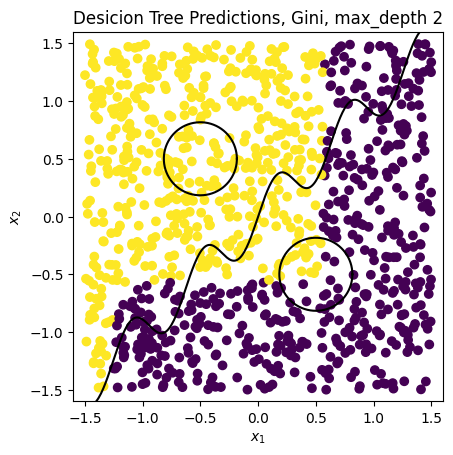

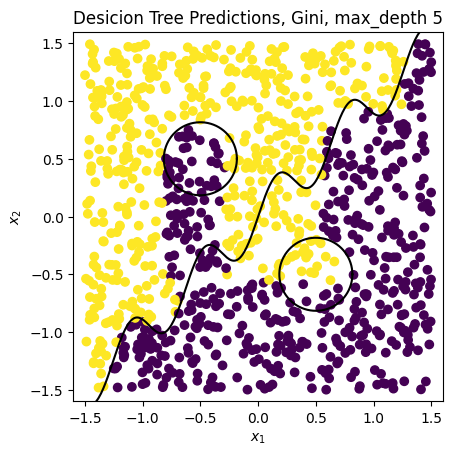

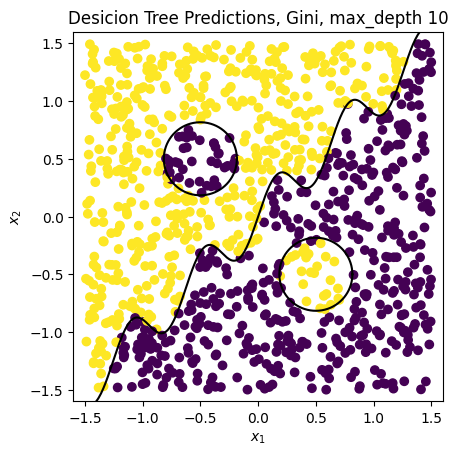

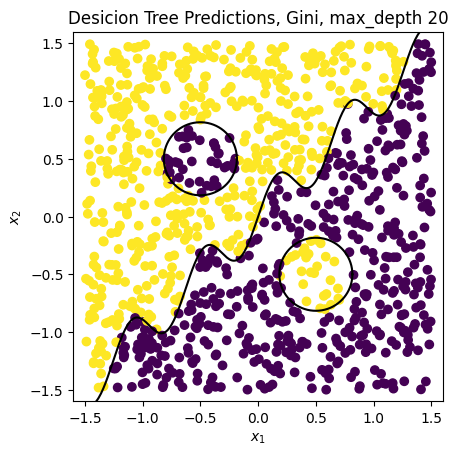

In [9]:
depths = [2,5,10,20]
for d in depths:
    decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    decision_tree_model.fit(x, y)
    y_hat_decision_tree = decision_tree_model.predict(x)
    plot_data_bndrs(x, y_hat_decision_tree, a, r, title= f'Desicion Tree Predictions, Gini, max_depth {d}')

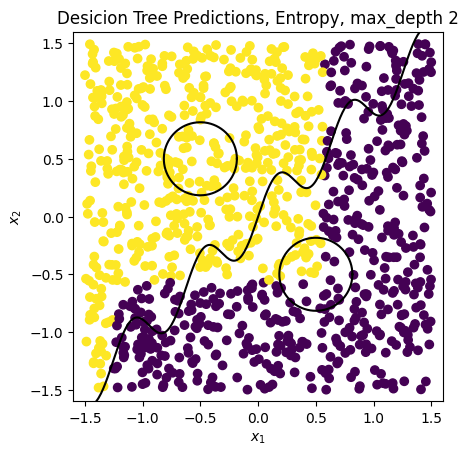

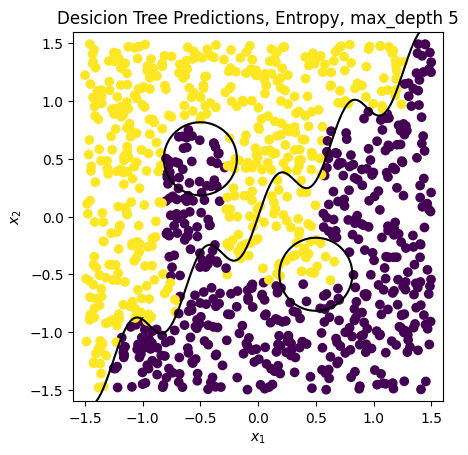

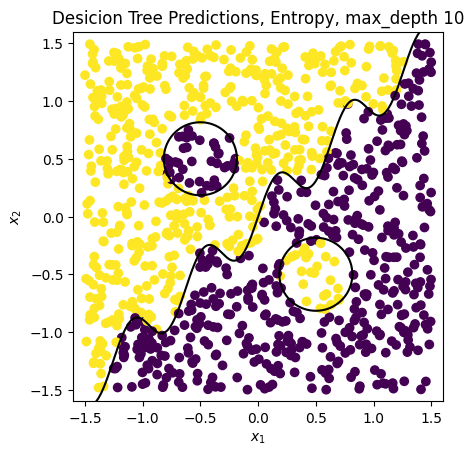

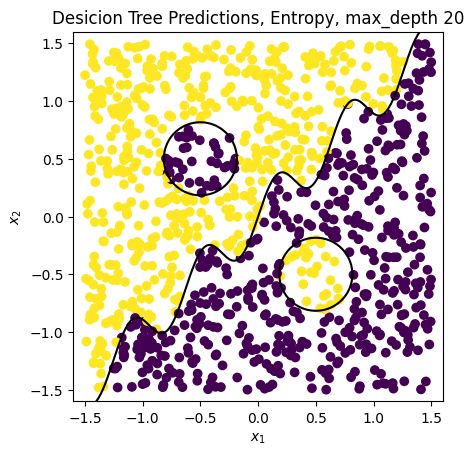

In [10]:
# visualize the linear seperations for low depths
depths = [2,5,10,20]
for d in depths:
    decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    decision_tree_model.fit(x, y)
    y_hat_decision_tree = decision_tree_model.predict(x)
    plot_data_bndrs(x, y_hat_decision_tree, a, r, title= f'Desicion Tree Predictions, Entropy, max_depth {d}')

In [11]:
# check variance problem using train, test sets
depths = np.arange(1, 21, 1)
precisions_tree_train = []
precisions_tree_test = []

for d in depths:
    decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=d)
    decision_tree_model.fit(x_train, y_train)
    precisions_tree_train.append(decision_tree_model.score(x_train, y_train))
    precisions_tree_test.append(decision_tree_model.score(x_test, y_test))

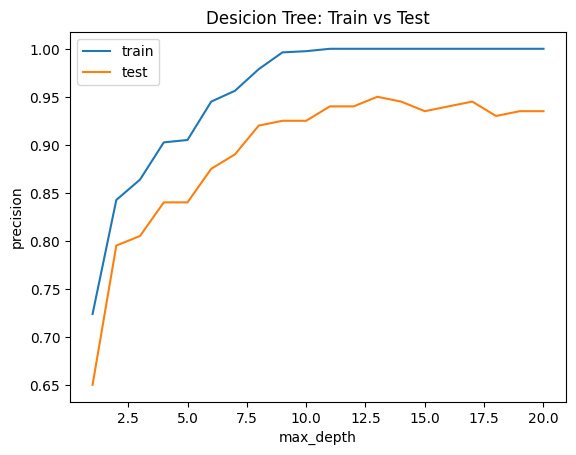

In [12]:
plt.plot(depths, precisions_tree_train, label = 'train')
plt.plot(depths, precisions_tree_test, label = 'test')
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.title('Desicion Tree: Train vs Test')
plt.legend()
plt.show()

# Use Random Forest

Bootstrap is an ensemble method in which:
- Given original data set $D$ with $m$ training examples
- We create $B$ training sets $D_i$, $i=1,\dots,B$, each of the same size $m$,  
by sampling from $D$ with replacement, i.e. we can have the same training examples multiple times. 
- For each one of the training sets we train a classifier (i.e. Decision Tree) and make a prediction by taking the average of the classifiers
- Reduces Variance and make the classifier more robust.    


In addition for Random Forest:
- for each node we split only based on a subset of features $k\sim \sqrt{n}$ with $n$ the number of fearutes of each training example.

In [13]:
depths = np.arange(1, 21, 1)
precisions_random_forest_gini = []
precisions_random_forest_entropy = []

for d in depths:
    random_forest_model_gini = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=d)
    random_forest_model_gini.fit(x, y)
    precisions_random_forest_gini.append(random_forest_model_gini.score(x, y))
    random_forest_model_entropy = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=d)
    random_forest_model_entropy.fit(x, y)
    precisions_random_forest_entropy.append(random_forest_model_entropy.score(x, y))

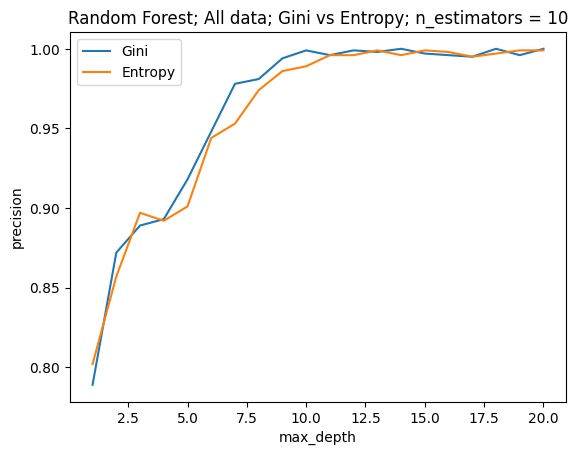

In [14]:
plt.plot(depths, precisions_random_forest_gini, label = 'Gini')
plt.plot(depths, precisions_random_forest_entropy, label = 'Entropy')
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.title('Random Forest; All data; Gini vs Entropy; n_estimators = 10')
plt.legend()
plt.show()

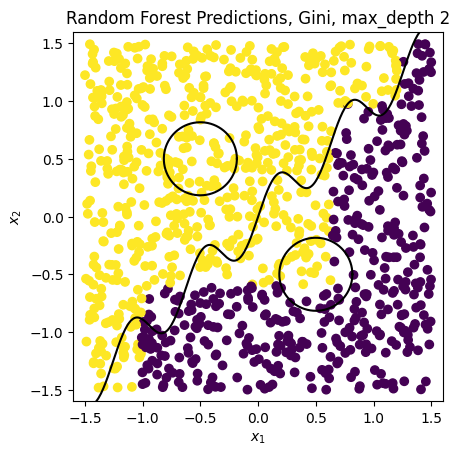

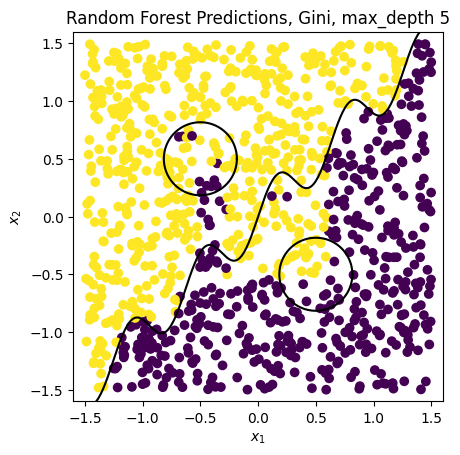

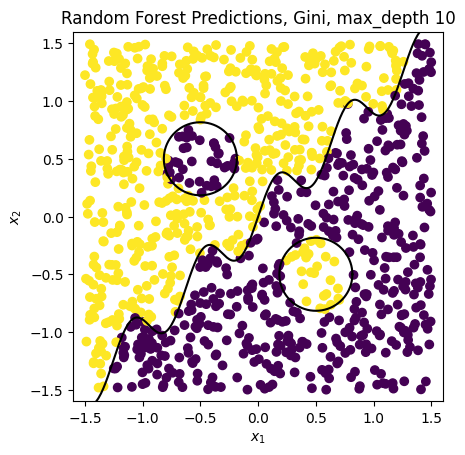

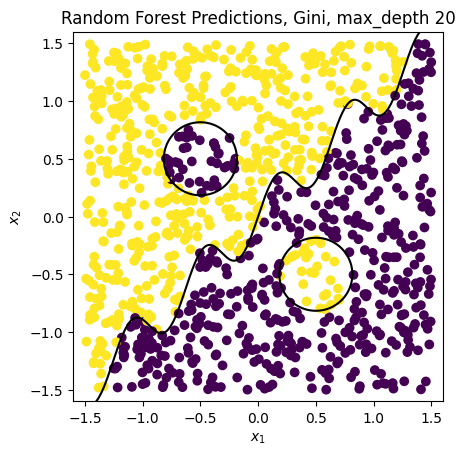

In [15]:
depths = [2,5,10,20]
for d in depths:
    random_forest_model_gini = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=d)
    random_forest_model_gini.fit(x, y)
    y_hat_random_forest = random_forest_model_gini.predict(x)
    plot_data_bndrs(x, y_hat_random_forest, a, r, title= f'Random Forest Predictions, Gini, max_depth {d}')

In [16]:
# check variance problem using train, test sets
depths = np.arange(1, 21, 1)
precisions_random_forest_train = []
precisions_random_forest_test = []

for d in depths:
    random_forest_model = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=d)
    random_forest_model.fit(x_train, y_train)
    precisions_random_forest_train.append(random_forest_model.score(x_train, y_train))
    precisions_random_forest_test.append(random_forest_model.score(x_test, y_test))

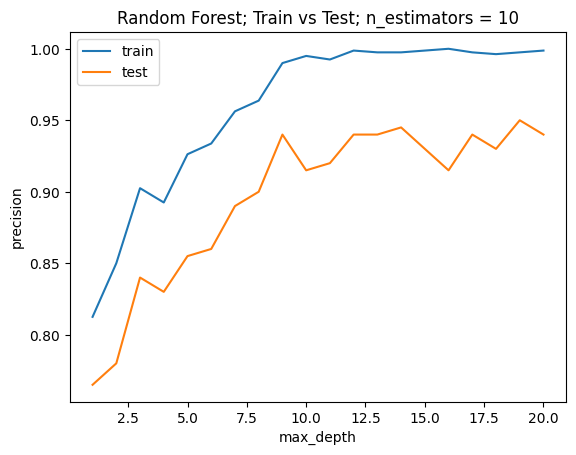

In [17]:
plt.plot(depths, precisions_random_forest_train, label = 'train')
plt.plot(depths, precisions_random_forest_test, label = 'test')
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.title('Random Forest; Train vs Test; n_estimators = 10')
plt.legend()
plt.show()

In [18]:
# check variance problem using train, test sets
trees = np.arange(1, 41, 1)
d = 13
precisions_random_forest_train = []
precisions_random_forest_test = []

for n in trees:
    random_forest_model = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d)
    random_forest_model.fit(x_train, y_train)
    precisions_random_forest_train.append(random_forest_model.score(x_train, y_train))
    precisions_random_forest_test.append(random_forest_model.score(x_test, y_test))

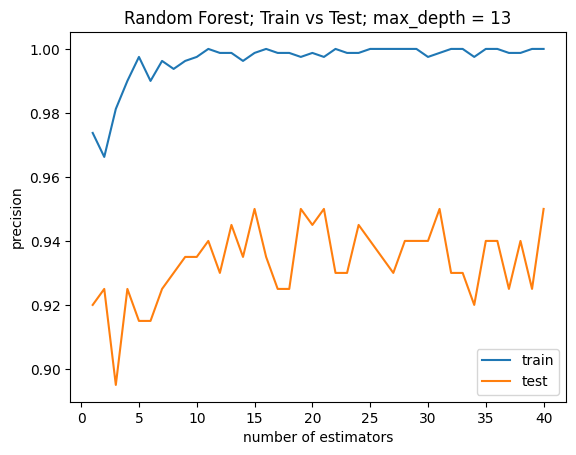

In [19]:
plt.plot(trees, precisions_random_forest_train, label = 'train')
plt.plot(trees, precisions_random_forest_test, label = 'test')
plt.xlabel('number of estimators')
plt.ylabel('precision')
plt.title('Random Forest; Train vs Test; max_depth = 13')
plt.legend()
plt.show()

# Adam Boost Classifier

Boosting is an ensemble method in which:
- Given original data set $D$ with $m$ training examples
- We create $B$ training sets $D_i$, $i=1,\dots,B$, each of the same size $m$,  
by sampling from $D$ with replacement, i.e. we can have the same training examples multiple times and train a classifier for each one, 
BUT contraty to Bootstrap we assign higher probability of picking the examples which were misclassified on the previous classifier
- Reduces Bias.

AdaBoost: train a Decision Tree with depth 1
XGBoost (Xtreme Gradient Boosting): uses a second order optimization method like Newton-Raphson

In [20]:
# note that 'SAMME' algorithm is much worse than 'SAME.R' algorithm
ada_boost_precisions_train = []
ada_boost_precisions_test = []
n_est = np.linspace(1, 1000, 11).astype(int)

for n in n_est: 
    ada_boost_model = AdaBoostClassifier(n_estimators = n)
    ada_boost_model.fit(x_train, y_train)
    ada_boost_precisions_train.append(ada_boost_model.score(x_train, y_train))
    ada_boost_precisions_test.append(ada_boost_model.score(x_test, y_test))

c:\Users\rigat\Desktop\venv ML\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\rigat\Desktop\venv ML\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\rigat\Desktop\venv ML\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\rigat\Desktop\venv ML\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

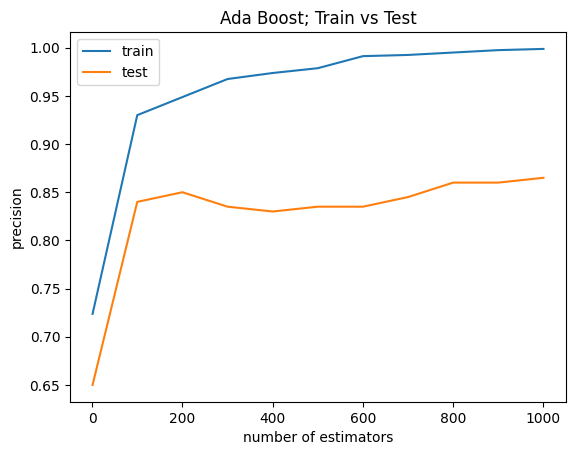

In [21]:
plt.plot(n_est, ada_boost_precisions_train, label = 'train')
plt.plot(n_est, ada_boost_precisions_test, label = 'test')
plt.xlabel('number of estimators')
plt.ylabel('precision')
plt.title('Ada Boost; Train vs Test')
plt.legend()
plt.show()

c:\Users\rigat\Desktop\venv ML\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


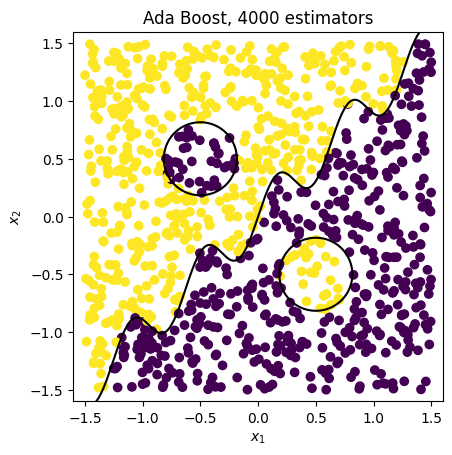

In [22]:
ada_boost_model = AdaBoostClassifier(n_estimators = 4000)
ada_boost_model.fit(x, y)
y_hat_ada_boost = ada_boost_model.predict(x)
plot_data_bndrs(x, y_hat_ada_boost, a, r, title= f'Ada Boost, 4000 estimators')

# Suppor Vector Machines

Finds a hyperplane that linearly seperates the data into the two classes, by maximizes the margin between the two classes. For non-linearly seperated data we use the kernel trick which first transforms the data, even to a higher dimension, and then apply SVM.

In [23]:
# \gamma is the coefficient of the kernel  
presicions_svm_train = []
presicions_svm_test = []
gammas =  list(np.arange(1, 20)) + list(np.arange(20, 110, 10)) + list(np.arange(200, 1100, 100))

for gamma in gammas:
    svc_model = SVC(gamma=gamma,)
    svc_model.fit(x_train, y_train)
    presicions_svm_train.append(svc_model.score(x_train, y_train))
    presicions_svm_test.append(svc_model.score(x_test, y_test))

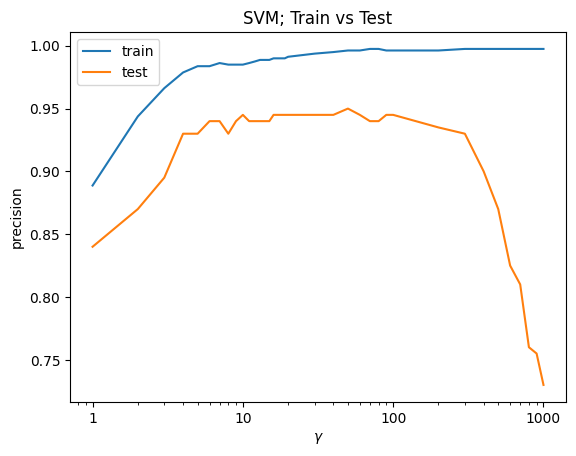

In [24]:
plt.plot(gammas, presicions_svm_train, label = 'train')
plt.plot(gammas, presicions_svm_test, label = 'test')
plt.xscale('log')
plt.xticks([1, 10, 100, 1000], [1, 10, 100, 1000])
plt.xlabel('$\\gamma $')
plt.ylabel('precision')
plt.title('SVM; Train vs Test')
plt.legend()
plt.show()

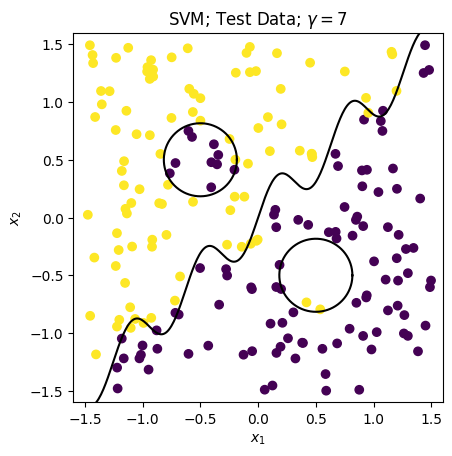

In [25]:
svc_model = SVC(gamma=7)
svc_model.fit(x_train, y_train)
svc_predict = svc_model.predict(x_test)
plot_data_bndrs(x_test, svc_predict, a, r, title= f'SVM; Test Data; $\\gamma = 7$')

# XGBOOST

In [26]:
from xgboost import XGBClassifier

In [27]:
# set the y labels to 0 instead of -1; required by the xgboost
for i in np.where(y_train == -1):
    y_train[i] = 0

for i in np.where(y_test == -1):
    y_test[i] = 0

In [28]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_hat_xgb = model.predict(x_test)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.92)

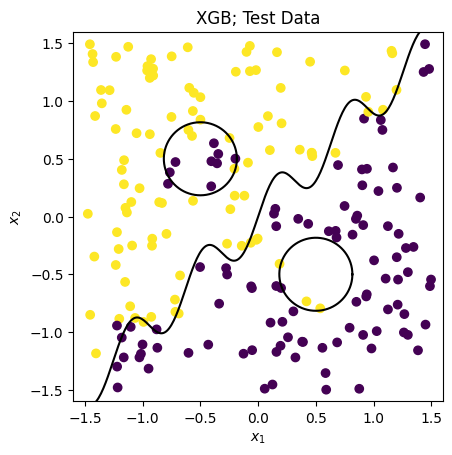

In [29]:
plot_data_bndrs(x_test, y_hat_xgb, a, r, title= f'XGB; Test Data')